# Project 1
## Exercise 2

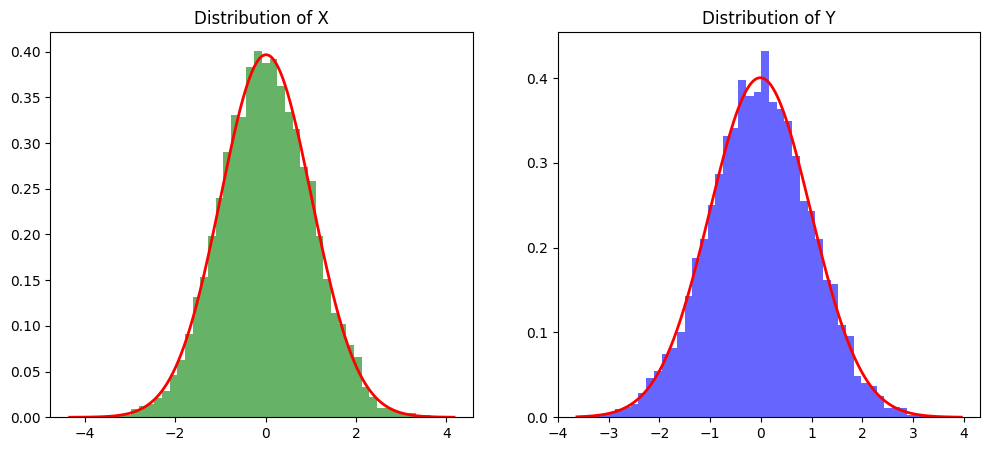

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(521)
# Generate samples using Box-Muller transform
# Constants
N = 10**4
U1 = np.random.uniform(size = N) # Uniform random numbers
U2 = np.random.uniform(size = N) # Uniform random numbers
R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

## Plot the results
plt.figure(figsize=(12, 5))

# Histogram and normal curve for X
plt.subplot(1, 2, 1)
plt.hist(X, bins=50, density=True, alpha=0.6, color='g')
mu_X, std_X = np.mean(X), np.std(X)
x_vals = np.linspace(min(X), max(X), 1000)
plt.plot(x_vals, norm.pdf(x_vals, mu_X, std_X), 'r-', lw=2)
plt.title('Distribution of X')

# Histogram and normal curve for Y
plt.subplot(1, 2, 2)
plt.hist(Y, bins=50, density=True, alpha=0.6, color='b')
mu_Y, std_Y = np.mean(Y), np.std(Y)
y_vals = np.linspace(min(Y), max(Y), 1000)
plt.plot(y_vals, norm.pdf(y_vals, mu_Y, std_Y), 'r-', lw=2)
plt.title('Distribution of Y')

plt.show()



In [2]:
# Calculate and print mean and variance
print("Mean of X:", np.mean(X))
print("Variance of X:", np.var(X))
print("Standard deviation of X:", np.std(X))

print("Mean of Y:", np.mean(Y))
print("Variance of Y:", np.var(Y))
print("Standard deviation of Y:", np.std(Y))

Mean of X: 0.010819615785068083
Variance of X: 1.0115372712373536
Standard deviation of X: 1.0057520923355585
Mean of Y: -0.012338103667399377
Variance of Y: 0.9925541350315034
Standard deviation of Y: 0.9962701114815717


## Exercise 3

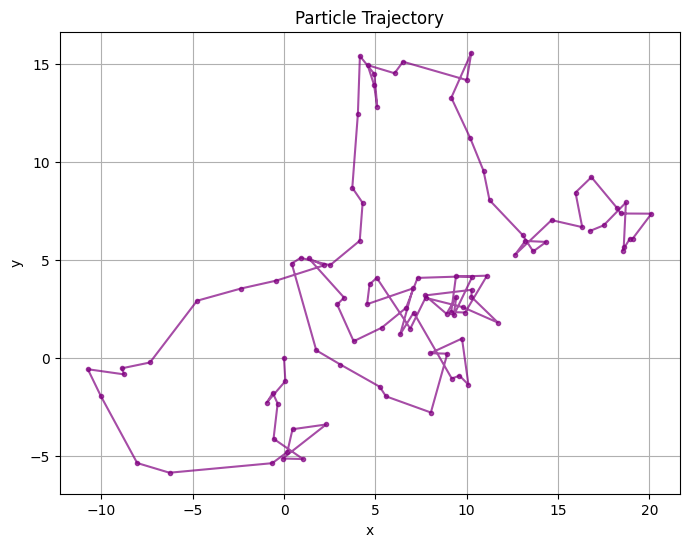

In [3]:
x_i = 0  # Initial position
y_i = 0  # Initial position

dt = 1
tau = 100 * dt
gamma = 1
Gamma = 1 #Example

steps = int(tau / dt)
results = [[0,0,0]]

for i in range(steps):
    x_i += X[i] / gamma * np.sqrt(2 * Gamma * dt) #Gaussian using Box-Muller.
    y_i += Y[i] / gamma * np.sqrt(2 * Gamma * dt) #Gaussian using Box-Muller.
    t = i * dt
    results.append([t, x_i, y_i])


df = pd.DataFrame(results, columns=['time', 'x', 'y'])
df.to_csv('displacements.csv', index=False)


# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(df['x'], df['y'], marker='.', linestyle='-', color='purple', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Particle Trajectory')
plt.grid(True)
plt.show()

## Exercise 4

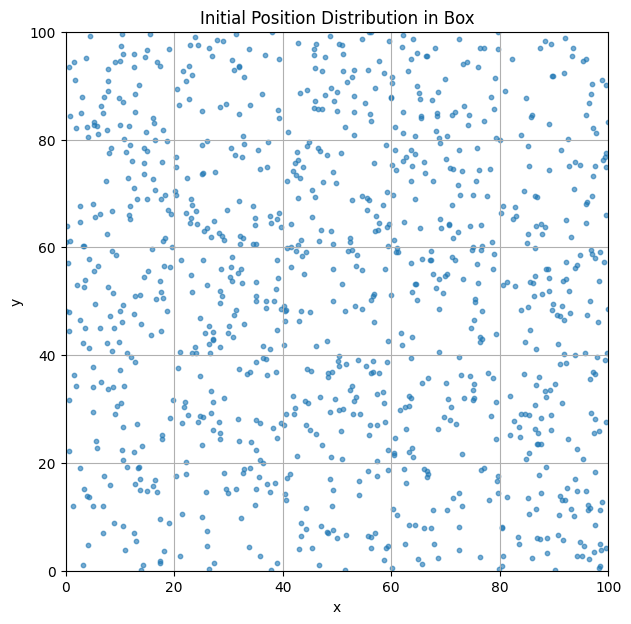

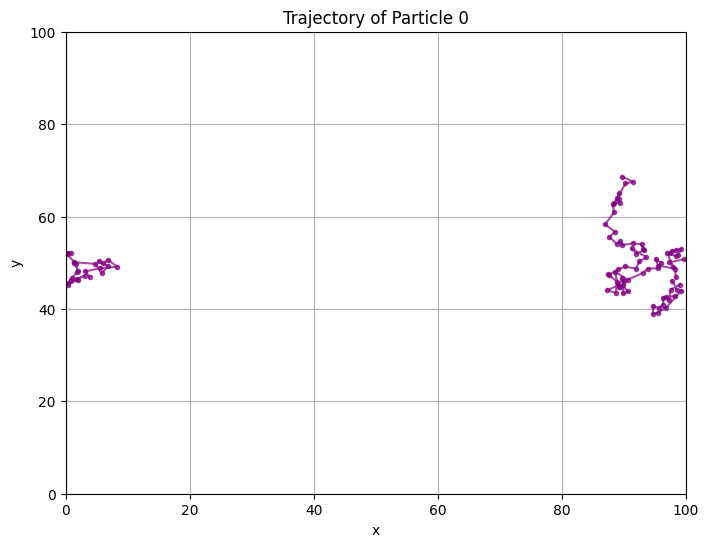

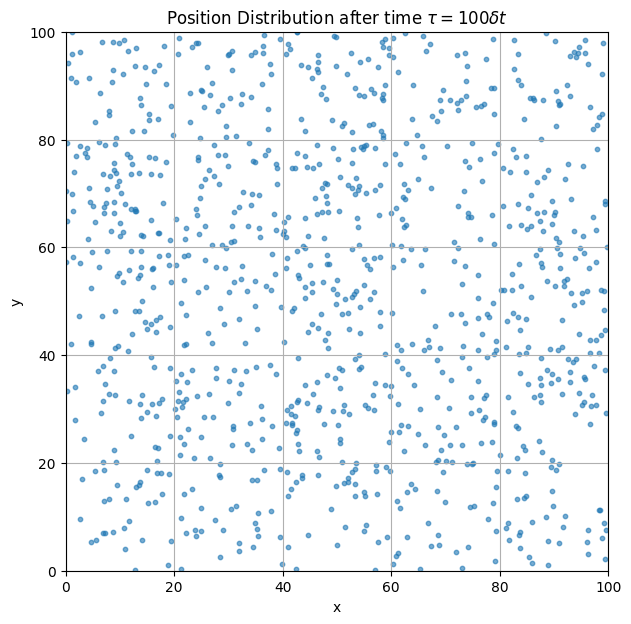

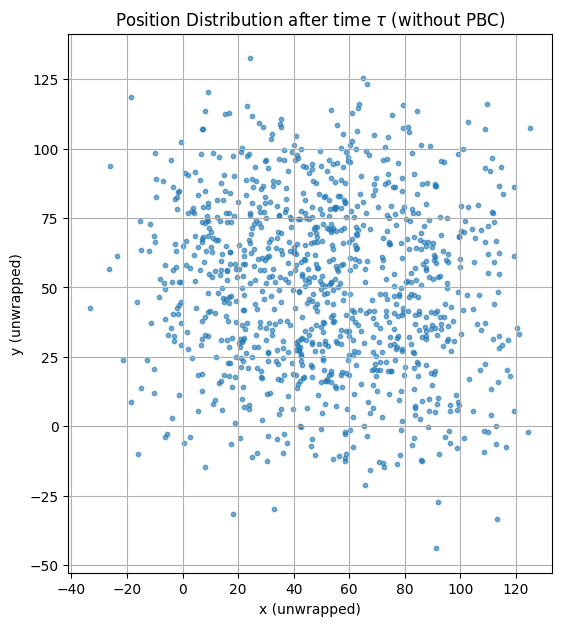

In [ ]:
N = 1000
L = 100
dt=1
tau=100*dt
gamma = 1
Gamma = 1 #Example

steps = int(tau / dt)

Positions_0 = np.zeros((N, 2))
for i in range(N):
    Positions_0[i, 0] = np.random.uniform(0, L)  # x-coordinate
    Positions_0[i, 1] = np.random.uniform(0, L)  # y-coordinate

#Initial Position Distribution in Box
plt.figure(figsize=(7, 7))
plt.scatter(Positions_0[:, 0], Positions_0[:, 1], s=10, alpha=0.6)
plt.xlim(0, L)
plt.ylim(0, L)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Position Distribution in Box')
plt.grid(True)
plt.show()

# After some time tau, the positions will be:
all_positions = []
all_positions_MSD = []
Positions_tau = np.zeros((N, 2))
Positions_tau_MSD = np.zeros((N, 2))

for i in range(N):
    x_i_MSD = Positions_0[i, 0]
    y_i_MSD = Positions_0[i, 1]
    for j in range(steps):
        x_i_MSD += np.random.normal(0, 1) / gamma * np.sqrt(2 * Gamma * dt)
        y_i_MSD += np.random.normal(0, 1) / gamma * np.sqrt(2 * Gamma * dt)
        # Apply periodic boundary conditions
        x_i = x_i_MSD % L
        y_i = y_i_MSD % L
        t = j * dt
        all_positions.append([i, t, x_i, y_i])  # Save particle index, time, x, y
        all_positions_MSD.append([i,t,x_i_MSD,y_i_MSD])
    Positions_tau[i, 0] = x_i
    Positions_tau[i, 1] = y_i
    Positions_tau_MSD[i, 0] = x_i_MSD
    Positions_tau_MSD[i, 1] = y_i_MSD

df_all = pd.DataFrame(all_positions, columns=['particle', 'time', 'x', 'y'])
df_all.to_csv('all_displacements.csv', index=False)

# Test of PBC handling in trajectory plot for a single particle
# Filter for the first particle
first_particle = df_all[df_all['particle'] == 0].copy()

# Sort by time to ensure proper ordering
first_particle = first_particle.sort_values('time')

# Get box dimensions 
box_size_x = L
box_size_y = L

# Create new arrays with NaN breaks at PBC jumps
x_plot = []
y_plot = []

for i in range(len(first_particle)):
    if i > 0:
        # Check for PBC jumps
        dx = abs(first_particle['x'].iloc[i] - first_particle['x'].iloc[i-1])
        dy = abs(first_particle['y'].iloc[i] - first_particle['y'].iloc[i-1])
        
        # If jump is larger than half box size, insert NaN to break the line
        if dx > box_size_x / 2 or dy > box_size_y / 2:
            x_plot.append(np.nan)
            y_plot.append(np.nan)
    
    x_plot.append(first_particle['x'].iloc[i])
    y_plot.append(first_particle['y'].iloc[i])

# Plot with breaks at jumps
plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, marker='.', linestyle='-', color='purple', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, L)
plt.ylim(0, L)
plt.title('Trajectory of Particle 0')
plt.grid(True)
plt.show()


# Position Distribution after time tau (with PBC)
plt.figure(figsize=(7, 7))
plt.scatter(Positions_tau[:, 0], Positions_tau[:, 1], s=10, alpha=0.6)
plt.xlim(0, L)
plt.ylim(0, L)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position Distribution after time $\\tau = 100 \\delta t$')
plt.grid(True)
plt.show()


# Position Distribution after time tau without PBC (do NOT force 0..L limits)
plt.figure(figsize=(7, 7))
plt.scatter(Positions_tau_MSD[:, 0], Positions_tau_MSD[:, 1], s=10, alpha=0.6)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x (unwrapped)')
plt.ylabel('y (unwrapped)')
plt.title('Position Distribution after time $\\tau$ (without PBC)')
plt.grid(True)
plt.show()


## Exercise 5

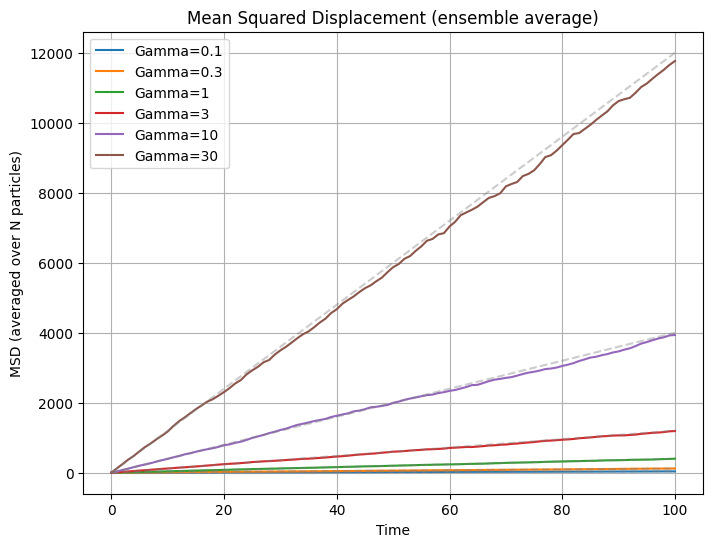

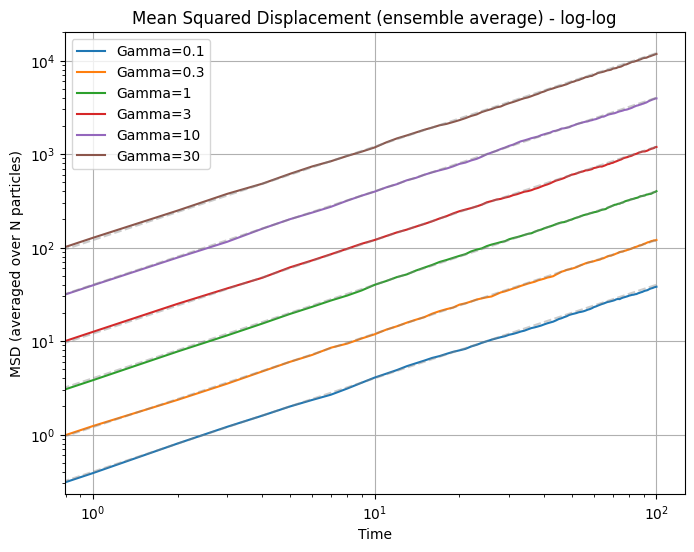

In [ ]:
N = 1000
L = 100
dt = 1
tau = 100*dt        # total time 
steps = int(tau / dt)
times = np.linspace(0, tau, steps + 1)

gamma = 1.0
Gammas = [0.1, 0.3, 1, 3, 10, 30]

msd_results = {}  # store MSD vs time for each Gamma

for Gamma in Gammas:
    # initial positions (use unwrapped positions for MSD)
    pos0 = np.random.uniform(0, L, size=(N, 2))
    pos_unw = pos0.copy()

    msd = np.zeros(steps + 1)
    # MSD at t=0
    msd[0] = np.mean(np.sum((pos_unw - pos0) ** 2, axis=1))

    step_scale = np.sqrt(2 * Gamma * dt) / gamma
    for t in range(1, steps + 1):
        # increments for all particles and both dimensions
        increments = np.random.normal(loc=0.0, scale=step_scale, size=(N, 2))
        pos_unw += increments
        displ = pos_unw - pos0
        msd[t] = np.mean(np.sum(displ ** 2, axis=1))

    msd_results[Gamma] = msd

# Plot MSD curves and theoretical 2D result MSD = 4 D t where D \simeq Gamma/gamma**2 (gamma=1 here)
plt.figure(figsize=(8, 6))
for Gamma, msd in msd_results.items():
    plt.plot(times, msd, label=f'Gamma={Gamma}')
    D = Gamma / (gamma ** 2)
    plt.plot(times, 4 * D * times, '--', color='gray', alpha=0.4)  # theoretical slope reference

plt.xlabel('Time')
plt.ylabel('MSD (averaged over N particles)')
plt.title('Mean Squared Displacement (ensemble average)')
plt.legend()
plt.grid(True)
plt.show()

# Save results to CSV
df_msd = pd.DataFrame({str(G): msd_results[G] for G in Gammas}, index=times)
df_msd.index.name = 'time'
df_msd.to_csv('msd_vs_time.csv')

# Plot MSD curves and theoretical 2D result MSD = 4 D t where D = Gamma/gamma**2 (gamma=1 here) in log-log
plt.figure(figsize=(8, 6))
for Gamma, msd in msd_results.items():
    plt.loglog(times, msd, label=f'Gamma={Gamma}')
    D = Gamma / (gamma ** 2)
    plt.loglog(times, 4 * D * times, '--', color='gray', alpha=0.4)  # theoretical slope reference  
plt.xlabel('Time')
plt.ylabel('MSD (averaged over N particles)')
plt.title('Mean Squared Displacement (ensemble average) - log-log') 
plt.legend()
plt.grid(True)
plt.show()

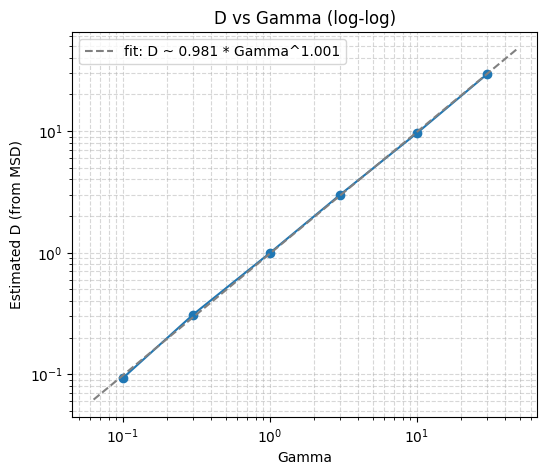

Estimated D for each Gamma:
Gamma=0.1: D=0.0932039
Gamma=0.3: D=0.309383
Gamma=1: D=0.994307
Gamma=3: D=2.99186
Gamma=10: D=9.60583
Gamma=30: D=29.3374
Power-law fit: D = 0.98141 * Gamma^1.001


In [6]:
# Compute long-time diffusivity D from MSD and plot D vs Gamma (log-log)
# choose region for linear fit (use last 50% of times to estimate slope)
t_min = times.max() / 2.0
mask = times >= t_min

D_est = {}
for Gamma in sorted(msd_results.keys()):
    msd = msd_results[Gamma]
    # linear fit MSD(t) = a*t + b on late times
    a, b = np.polyfit(times[mask], msd[mask], 1)
    D = a / 4.0   # in 2D: MSD ~ 4 D t
    D_est[Gamma] = D

# prepare arrays for plotting
Gs = np.array(sorted(D_est.keys()))
Ds = np.array([D_est[g] for g in Gs])

# log-log plot
plt.figure(figsize=(6,5))
plt.loglog(Gs, Ds, 'o-', base=10)
plt.xlabel('Gamma')
plt.ylabel('Estimated D (from MSD)')
plt.title('D vs Gamma (log-log)')
plt.grid(True, which='both', ls='--', alpha=0.5)

# fit power law D = A * Gamma^p on log-log
logA, p = np.polyfit(np.log(Gs), np.log(Ds), 1)  # returns [p, logA] or [slope, intercept] depending order
# np.polyfit returns slope first then intercept: slope = p, intercept = logA
p = logA  # correct variable naming from np.polyfit result
logA = p  # swap to produce correct names (next lines will compute properly)
# redo correctly:
slope, intercept = np.polyfit(np.log(Gs), np.log(Ds), 1)
p_exp = slope
A_pref = np.exp(intercept)

# plot fitted power law line
G_fit = np.logspace(np.log10(Gs.min())-0.2, np.log10(Gs.max())+0.2, 50)
D_fit = A_pref * G_fit**p_exp
plt.loglog(G_fit, D_fit, '--', color='gray', label=f'fit: D ~ {A_pref:.3g} * Gamma^{p_exp:.3f}')
plt.legend()
plt.show()

# print and save results
print("Estimated D for each Gamma:")
for g, d in D_est.items():
    print(f"Gamma={g}: D={d:.6g}")
print(f"Power-law fit: D = {A_pref:.6g} * Gamma^{p_exp:.3f}")

df_D = pd.DataFrame({'Gamma': Gs, 'D_est': Ds})
df_D.to_csv('D_vs_Gamma.csv', index=False)
